# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

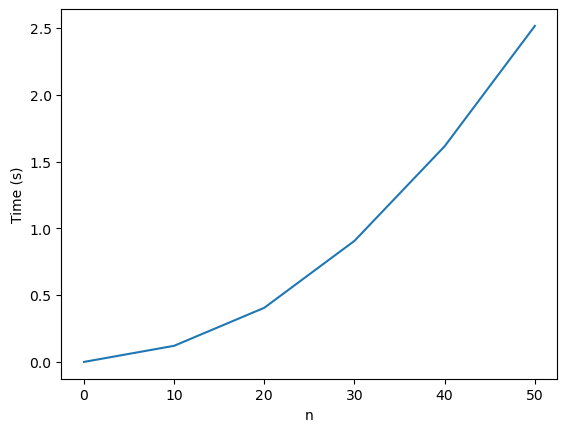

In [100]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

In [101]:
#Recursive function: 

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [103]:
def F(n):
    if n <= 2:
        return 1
    else: 
        return F(n-1) + F(n-2)

In [104]:
def timeit_rec(n):
    start = time.time()
    F(n)
    end = time.time()
    return end - start
    

In [105]:
N30 = list(range(1,31))

In [106]:
# [F(n) for n in range(1, 31)]

In [107]:
T_rec = [timeit_rec(n) for n in N30]

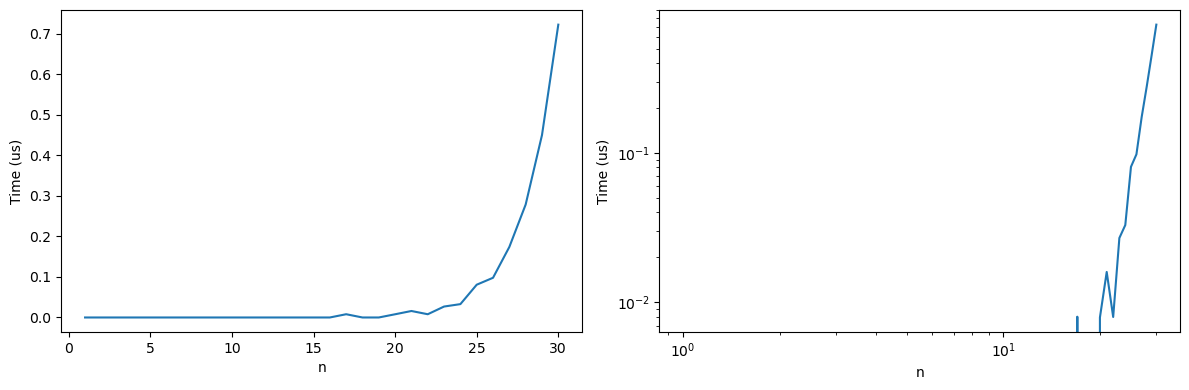

In [181]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(N30, T_rec)
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.subplot(122)
plt.loglog(N30, T_rec);
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.tight_layout()

In [109]:
#Keep last 2 values function:

In [115]:
def last_two(n):
    a = b = 1
    for i in range(3, n+1):
        a, b = b, a + b 
    return b

In [131]:
def timeit_last_two(n, repeat):
    start = time.time()
    for i in range(repeat):
        last_two(n)
        
    end = time.time()
    return (end - start) / repeat
    

In [122]:
N100 = list(range(1,101))

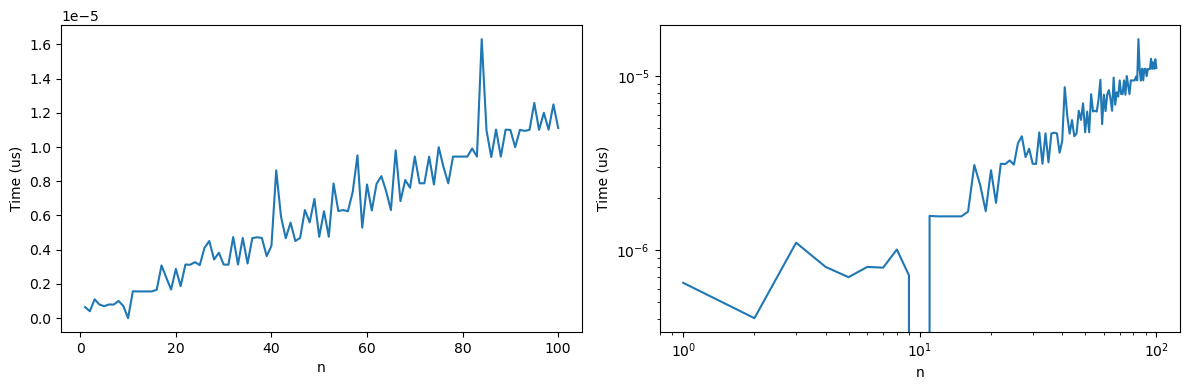

In [182]:
T_last_two = [timeit_last_two(n, 10000) for n in N100]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(N100, T_last_two)
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.subplot(122)
plt.loglog(N100, T_last_two);
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.tight_layout()

In [ ]:
#Table function:

In [207]:
def table(n):
    fib = [1, 1]
    if n <= 2:
        return 1
    for i in range(n - 2):
        temp = fib[-1] + fib[-2]
        fib.append(temp)
    return fib[-1]



In [154]:
def timeit_table(n, repeat):
    start = time.time()
    for i in range(repeat):
        table(n)
        
    end = time.time()
    return (end - start) / repeat

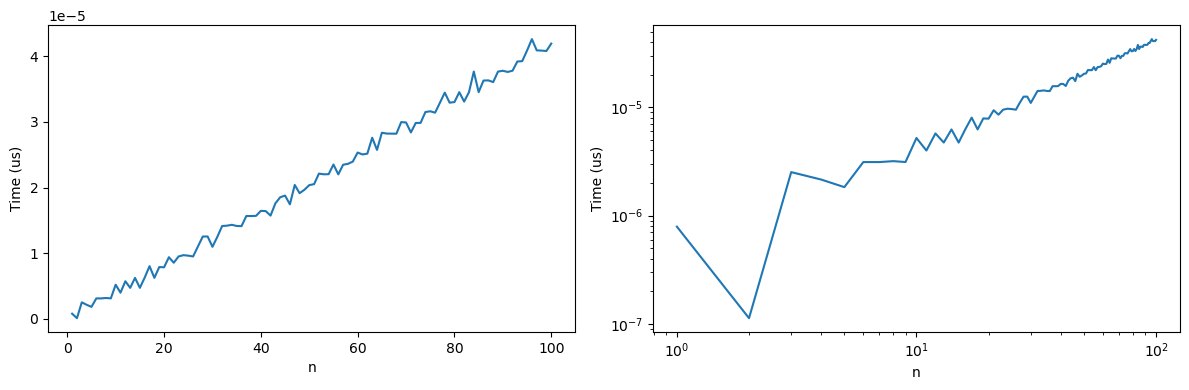

In [158]:
N100 = list(range(1,101))
T_table = [timeit_table(n, 10000) for n in N100]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(N100, T_table)
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.subplot(122)
plt.loglog(N100, T_table);
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.tight_layout()

In [ ]:
#Analytical function: 

In [ ]:
import math

def analytical(n):
    phi = ((1 + math.sqrt(5)) / 2)
    fib = round(( (phi ** n) - ( (1 - phi) ** n ) ) / math.sqrt(5) )
    return fib

In [173]:
def timeit_analytical(n, repeat):
    start = time.time()
    for i in range(repeat):
        analytical(n)
        
    end = time.time()
    return (end - start) / repeat

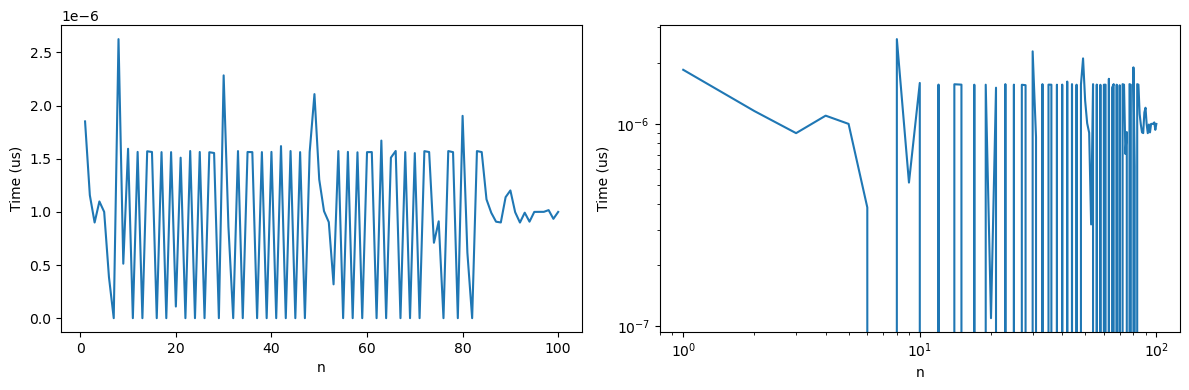

In [180]:
N100 = list(range(1,101))
T_analytical = [timeit_analytical(n, 10000) for n in N100]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(N100, T_analytical)
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.subplot(122)
plt.loglog(N100, T_analytical);
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.tight_layout()

In [217]:
#Class question 2: 

In [219]:
for n in list(range(1, 101)):
      if(analytical(n) != table(n)):
            print('Analytical method value: ' + str(analytical(n)) + ';' +' Table method value: '+ str(table(n)) + ';' + ' It is the ' + str(n) + 'th Fibonacci value.')
            break

Analytical method value: 308061521170130; Table method value: 308061521170129; It is the 71th Fibonacci value.


In [ ]:
#Matrix method:

In [227]:
def fib_matrix(n):
    Matrix = np.matrix([[0,1],[1,1]])
    vec = np.array([[0],[1]])
    return np.matmul(Matrix**n,vec).item(0)

fib_matrix(30)

832040

In [223]:
def timeit_matrix(n, repeat):
    start = time.time()
    for i in range(repeat):
        fib_matrix(n)
        
    end = time.time()
    return (end - start) / repeat

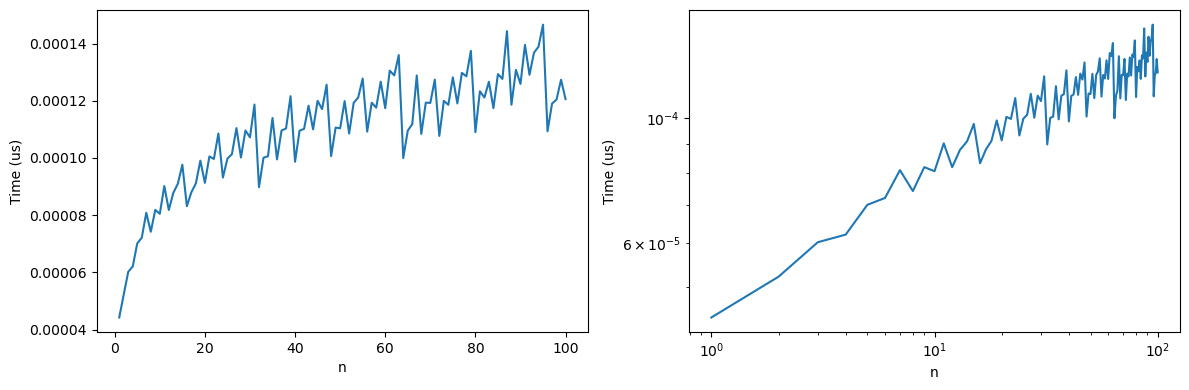

In [224]:
N100 = list(range(1,101))
T_matrix = [timeit_matrix(n, 10000) for n in N100]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(N100, T_matrix)
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.subplot(122)
plt.loglog(N100, T_matrix);
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.tight_layout()